In [1]:
%matplotlib widget

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import os

In [3]:
# Local imports
from owai.core.calibrate import Calibrate
import owai.core.data_models as odm

In [4]:
# Get the raw data
data_folder = "2024-07-01_AurenV1_calibration-data-collection"
# data_folder = "2024-07-24_AurenV1_calibration/results"
path = os.path.join("Olympus", "Projects", "1010564-OPEN-HEARING", "Technical Work", "Testing", "Data", data_folder)  # From windows
if os.environ.get("OLYMPUS_PROJECTS_PATH", False):
    path = path.replace(os.path.join('Olympus', "Projects"), os.environ.get("OLYMPUS_PROJECTS_PATH"))

auren_files = [os.path.join(path, f) for f in ["AUDIO003.WAV", "AUDIO005.WAV", "AUDIO007.WAV", "AUDIO009.WAV"]]
ref_files = [os.path.join(path, f) for f in ["BKProbe_004.wav", "BKProbe_006.wav", "BKProbe_008.wav", "BKProbe_010.wav"]]

raw_data = odm.RawData()
raw_data.load_wav(auren_files, ref_files)

Couldn't read file using scipy, falling back to soundfile. This was the error  WAV header is invalid: nAvgBytesPerSec must equal product of nSamplesPerSec and nBlockAlign, but file has nSamplesPerSec = 96000, nBlockAlign = 8, and nAvgBytesPerSec = 192000
Couldn't read file using scipy, falling back to soundfile. This was the error  WAV header is invalid: nAvgBytesPerSec must equal product of nSamplesPerSec and nBlockAlign, but file has nSamplesPerSec = 96000, nBlockAlign = 8, and nAvgBytesPerSec = 192000
Couldn't read file using scipy, falling back to soundfile. This was the error  WAV header is invalid: nAvgBytesPerSec must equal product of nSamplesPerSec and nBlockAlign, but file has nSamplesPerSec = 96000, nBlockAlign = 8, and nAvgBytesPerSec = 192000
Couldn't read file using scipy, falling back to soundfile. This was the error  WAV header is invalid: nAvgBytesPerSec must equal product of nSamplesPerSec and nBlockAlign, but file has nSamplesPerSec = 96000, nBlockAlign = 8, and nAvgB

In [5]:
cal = Calibrate(raw_data=raw_data)

In [6]:
cal.save_cal_tones()

In [7]:
cal.calibration_tones[0].shape

(527998, 2)

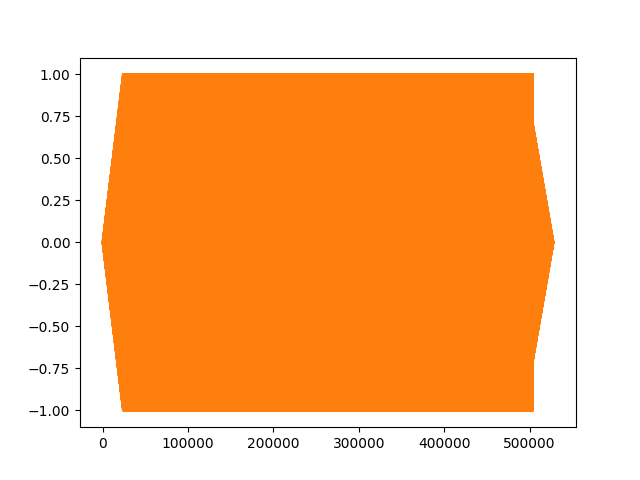

In [12]:
plt.close()
plt.plot(cal.calibration_tones[2])